In [1]:
import numpy as np
import scanpy as sc
import anndata as ad
from scipy import sparse

train_adata = sc.read_h5ad('batch_covid_subsampled_train.h5ad')
test_adata = sc.read_h5ad('batch_covid_subsampled_test.h5ad')

In [2]:
train_adata.obs.head()

,age,age_range,anatomical_region,anatomical_region_detailed,batch,dataset,disease,donor,ethnicity,ethnicity_mixed,...,final_annotation,mt_frac,n_counts,n_genes,sample_ID,size_factors,species,tissue,str_batch,batch_id
483188-0-0-1,NaN,nan,nan,nan,1,nan,nan,Donor33,nan,nan,...,nan,NaN,NaN,NaN,nan,NaN,nan,nan,HCL,3
P2_1_GGTGAAGAGAGAACAG_Krasnow-0-0,46.0,nan,distal,nan,0,Stanford_Krasnow_bioRxivTravaglini,nan,donor_2,nan,nan,...,nan,NaN,NaN,NaN,nan,NaN,nan,nan,Krasnow_distal 2,5
513429-0-0-1,NaN,nan,nan,nan,1,nan,nan,Donor48,nan,nan,...,nan,NaN,NaN,NaN,nan,NaN,nan,nan,HCL,3
CCTACCACACTCTGTC-1-HCATisStab7659969_Meyer-1-0,NaN,55-60,parenchyma,nan,0,Sanger_Meyer_2019Madissoon,nan,368C,nan,nan,...,nan,NaN,NaN,NaN,nan,NaN,nan,nan,Sanger_Meyer_2019Madissoon,13
144-0-1-0-1,NaN,nan,nan,nan,1,nan,nan,nan,nan,nan,...,nan,NaN,NaN,NaN,nan,NaN,nan,nan,COVID-19 (query),1


In [3]:
train_adata.var.head()

,n_cells-0,n_cells-0-0-1,gene_ids-1-0-1,feature_types-1-0-1,genome-1-0-1,gene_name,n_counts,highly_variable,highly_variable_rank,means,variances,variances_norm,highly_variable_nbatches
HES4,50004,2230.0,ENSG00000188290,Gene Expression,GRCh38,HES4,55101.0,True,286.0,0.200845,1.115144,1.942989,13
ISG15,109957,47536.0,ENSG00000187608,Gene Expression,GRCh38,ISG15,1522599.0,True,247.0,5.549922,331.823947,2.526526,15
TNFRSF4,11423,1749.0,ENSG00000186827,Gene Expression,GRCh38,TNFRSF4,15332.0,True,438.0,0.055886,0.415313,2.280897,13
MXRA8,12495,17039.0,ENSG00000162576,Gene Expression,GRCh38,MXRA8,1464.0,True,421.0,0.005336,0.007225,1.216231,4
ATAD3A,24432,2926.0,ENSG00000197785,Gene Expression,GRCh38,ATAD3A,14495.0,True,435.0,0.052835,0.073430,1.058414,3


In [4]:
print("Observation/Cell attributes columns:")
print(train_adata.obs.columns)

Observation/Cell attributes columns:
Index(['age', 'age_range', 'anatomical_region', 'anatomical_region_detailed',
       'batch', 'dataset', 'disease', 'donor', 'ethnicity', 'ethnicity_mixed',
       'last_author/PI', 'lung_vs_nasal', 'original_celltype_ann',
       'pack_years', 'sample', 'sample_alias', 'sample_type',
       'sampling_method', 'sex', 'smoking', 'total_counts',
       'log10_total_counts', 'n_genes_detected', 'mito_frac', 'ribo_frac',
       'compl', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4',
       'ann_level_5', 'ann_highest_res', 'ann_new', 'subject_type', 'study',
       'study2', 'celltype', 'condition', 'cellnames', 'cluster', 'stage',
       'ID', 'sample_new', 'chemistry', 'data_type', 'dpt_pseudotime',
       'final_annotation', 'mt_frac', 'n_counts', 'n_genes', 'sample_ID',
       'size_factors', 'species', 'tissue', 'str_batch', 'batch_id'],
      dtype='object')


In [5]:
train_categories = train_adata.obs['celltype'].unique()
test_categories = test_adata.obs['celltype'].unique()

train_categories_count = len(train_categories)
test_categories_count = len(test_categories)

train_categories_count, test_categories_count, train_categories, test_categories

(39,
 27,
 ['Monocytes', 'AT2', 'T cell', 'CD4+ T cells', 'Macrophages', ..., 'Monocyte progenitors', 'Proliferating Macrophage', 'Megakaryocytes', 'Megakaryocyte progenitors', 'CD10+ B cells']
 Length: 39
 Categories (39, object): ['AT1', 'AT2', 'B cell', 'CCR7+ T', ..., 'Tregs', 'innate T', 'mDC', 'pDC'],
 ['Mast cells', 'AT2', 'CD8+ T cells', 'Macrophages', 'pDC', ..., 'CD10+ B cells', 'Megakaryocytes', 'Signaling Alveolar Epithelial Type 2', 'Plasma', 'IGSF21+ Dendritic']
 Length: 27
 Categories (27, object): ['AT1', 'AT2', 'CD4+ T cells', 'CD8+ T cells', ..., 'Secretory', 'Signaling Alveolar Epithelial Type 2', 'mDC', 'pDC'])

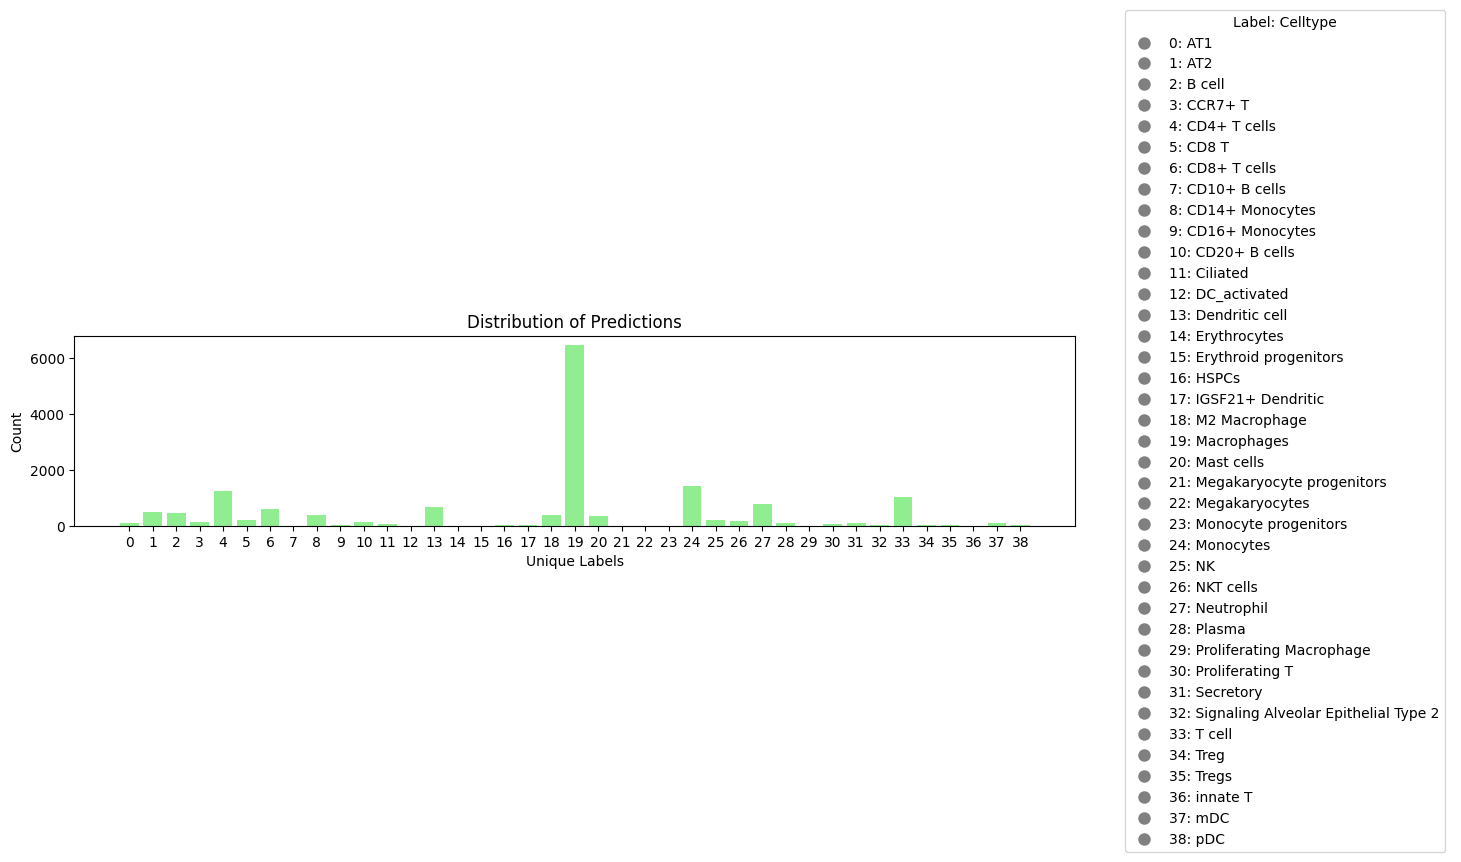

Label counts and percentages:
Label 0 (AT1): Count = 94, Percentage = 0.59%
Label 1 (AT2): Count = 494, Percentage = 3.09%
Label 2 (B cell): Count = 452, Percentage = 2.83%
Label 3 (CCR7+ T): Count = 155, Percentage = 0.97%
Label 4 (CD4+ T cells): Count = 1261, Percentage = 7.88%
Label 5 (CD8 T): Count = 200, Percentage = 1.25%
Label 6 (CD8+ T cells): Count = 598, Percentage = 3.74%
Label 7 (CD10+ B cells): Count = 8, Percentage = 0.05%
Label 8 (CD14+ Monocytes): Count = 379, Percentage = 2.37%
Label 9 (CD16+ Monocytes): Count = 39, Percentage = 0.24%
Label 10 (CD20+ B cells): Count = 126, Percentage = 0.79%
Label 11 (Ciliated): Count = 72, Percentage = 0.45%
Label 12 (DC_activated): Count = 8, Percentage = 0.05%
Label 13 (Dendritic cell): Count = 683, Percentage = 4.27%
Label 14 (Erythrocytes): Count = 13, Percentage = 0.08%
Label 15 (Erythroid progenitors): Count = 11, Percentage = 0.07%
Label 16 (HSPCs): Count = 17, Percentage = 0.11%
Label 17 (IGSF21+ Dendritic): Count = 20, Percen

In [6]:
import scanpy as sc
import torch
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt

# Convert celltypes to categorical and get encoded labels
train_adata.obs['celltype'] = train_adata.obs['celltype'].astype('category')
y_train = torch.tensor(train_adata.obs['celltype'].cat.codes.values).long()

test_adata.obs['celltype'] = test_adata.obs['celltype'].astype('category') 
y_test = torch.tensor(test_adata.obs['celltype'].cat.codes.values).long()

# Get distribution of labels
unique_labels, counts = np.unique(y_train, return_counts=True)

# Create label to celltype mapping
label_to_celltype = dict(enumerate(train_adata.obs['celltype'].cat.categories))

# Create figure with space for legend
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), gridspec_kw={'width_ratios': [3, 1]})

# Plot bar chart of label distribution
ax1.bar(unique_labels, counts, color='lightgreen', align='center')
ax1.set_xlabel('Unique Labels')
ax1.set_ylabel('Count') 
ax1.set_title('Distribution of Predictions')
ax1.set_xticks(unique_labels)

# Add legend with label-celltype mapping
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=f'{k}: {v}',
                             markerfacecolor='gray', markersize=10) 
                  for k, v in label_to_celltype.items()]
ax2.legend(handles=legend_elements, title='Label: Celltype', loc='center')
ax2.axis('off')

plt.tight_layout()
plt.show()

# Print statistics for each label
total = sum(counts)
print("Label counts and percentages:")
for label, count in zip(unique_labels, counts):
   percentage = (count / total) * 100
   celltype = label_to_celltype[label]
   print(f"Label {label} ({celltype}): Count = {count}, Percentage = {percentage:.2f}%")

In [7]:
total

15997

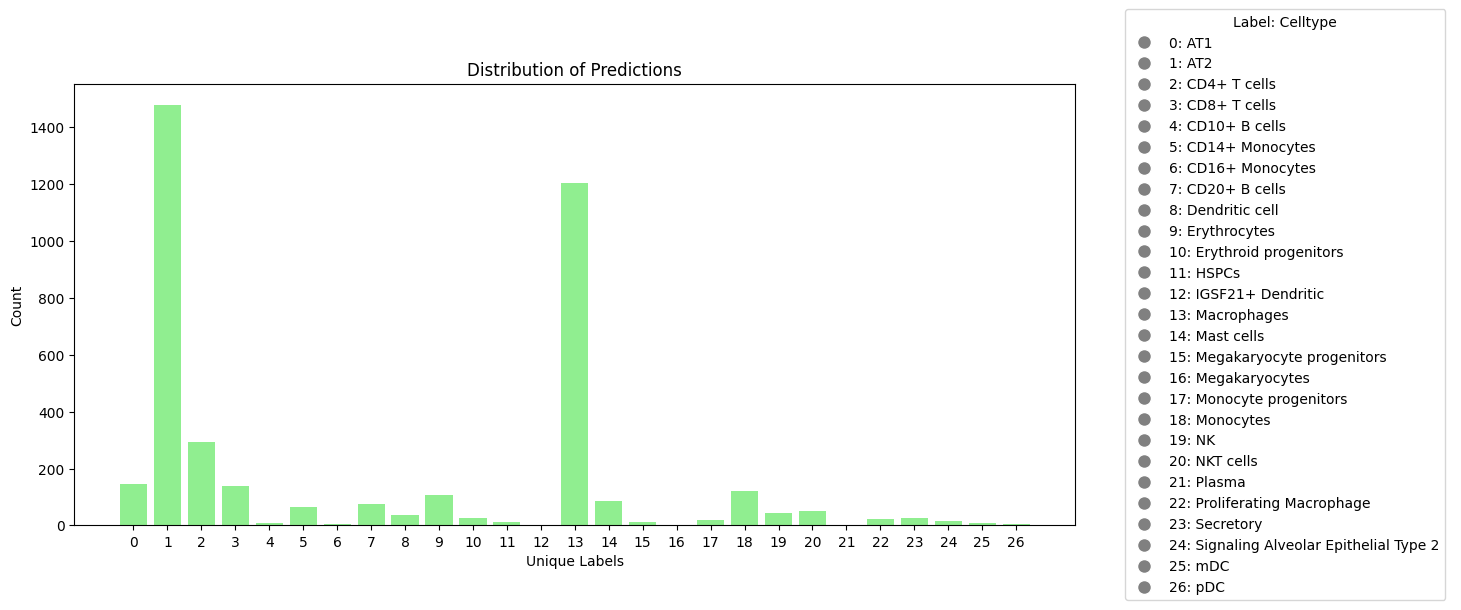

Label counts and percentages:
Label 0 (AT1): Count = 144, Percentage = 3.60%
Label 1 (AT2): Count = 1478, Percentage = 36.92%
Label 2 (CD4+ T cells): Count = 292, Percentage = 7.29%
Label 3 (CD8+ T cells): Count = 137, Percentage = 3.42%
Label 4 (CD10+ B cells): Count = 7, Percentage = 0.17%
Label 5 (CD14+ Monocytes): Count = 65, Percentage = 1.62%
Label 6 (CD16+ Monocytes): Count = 5, Percentage = 0.12%
Label 7 (CD20+ B cells): Count = 76, Percentage = 1.90%
Label 8 (Dendritic cell): Count = 37, Percentage = 0.92%
Label 9 (Erythrocytes): Count = 107, Percentage = 2.67%
Label 10 (Erythroid progenitors): Count = 27, Percentage = 0.67%
Label 11 (HSPCs): Count = 11, Percentage = 0.27%
Label 12 (IGSF21+ Dendritic): Count = 1, Percentage = 0.02%
Label 13 (Macrophages): Count = 1203, Percentage = 30.05%
Label 14 (Mast cells): Count = 87, Percentage = 2.17%
Label 15 (Megakaryocyte progenitors): Count = 11, Percentage = 0.27%
Label 16 (Megakaryocytes): Count = 1, Percentage = 0.02%
Label 17 (M

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Get distribution of labels in test set
unique_labels, counts = np.unique(y_test, return_counts=True)

# Create label to celltype mapping for test set
label_to_celltype = dict(enumerate(test_adata.obs['celltype'].cat.categories))

# Create figure with space for legend 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), gridspec_kw={'width_ratios': [3, 1]})

# Plot bar chart of label distribution
ax1.bar(unique_labels, counts, color='lightgreen', align='center')
ax1.set_xlabel('Unique Labels')
ax1.set_ylabel('Count')
ax1.set_title('Distribution of Predictions')
ax1.set_xticks(unique_labels)

# Add legend with label-celltype mapping
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=f'{k}: {v}',
                             markerfacecolor='gray', markersize=10) 
                  for k, v in label_to_celltype.items()]
ax2.legend(handles=legend_elements, title='Label: Celltype', loc='center')
ax2.axis('off')

plt.tight_layout()
plt.show()

# Print statistics for each label
total = sum(counts)
print("Label counts and percentages:")
for label, count in zip(unique_labels, counts):
   percentage = (count / total) * 100
   celltype = label_to_celltype[label]
   print(f"Label {label} ({celltype}): Count = {count}, Percentage = {percentage:.2f}%")

In [9]:
total

4003